# Seminar 2: Learn the Basics

**Deep Learning Course 2025**

**Author:** Nikita Kiselev

## 1. Introduction

Most machine learning workflows involve working with data, creating
models, optimizing model parameters, and saving the trained models. This
tutorial introduces you to a complete ML workflow implemented in
PyTorch, with links to learn more about each of these concepts.

We\'ll use the FashionMNIST dataset to train a neural network that
predicts if an input image belongs to one of the following classes:
T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker,
Bag, or Ankle boot.

## 2. Tensors

Tensors are a specialized data structure that are very similar to arrays
and matrices. In PyTorch, we use tensors to encode the inputs and
outputs of a model, as well as the model's parameters.

Tensors are similar to [NumPy's](https://numpy.org/) ndarrays, except
that tensors can run on GPUs or other hardware accelerators. In fact,
tensors and NumPy arrays can often share the same underlying memory,
eliminating the need to copy data. Tensors are also
optimized for automatic differentiation (see Lecture 1 + Seminar 1). If you're
familiar with ndarrays, you'll be right at home with the Tensor API. If
not, follow along!


In [1]:
!pip install -q torchviz

In [2]:
import torch
import numpy as np
from torchviz import make_dot

### 2.1. Initializing a Tensor

Tensors can be initialized in various ways. Take a look at the following
examples:

**Directly from data**

Tensors can be created directly from data. The data type is
automatically inferred.


In [3]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

**From a NumPy array**

Tensors can be created from NumPy arrays (and vice versa).


In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

# Alternative
# x_np = torch.tensor(np_array)

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument
tensor, unless explicitly overridden.


In [5]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6291, 0.0407],
        [0.1246, 0.0905]]) 



**With random or constant values:**

`shape` is a tuple of tensor dimensions. In the functions below, it
determines the dimensionality of the output tensor.


In [6]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
full_tensor = torch.full(shape, 7)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor} \n")
print(f"Full Tensor: \n {full_tensor}")

Random Tensor: 
 tensor([[0.9489, 0.2611, 0.5786],
        [0.8300, 0.8108, 0.1453]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 

Full Tensor: 
 tensor([[7, 7, 7],
        [7, 7, 7]])


### 2.2. Attributes of a Tensor



Tensor attributes describe their shape, datatype, and the device on
which they are stored.


In [7]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape} or {tensor.size()}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Number of dimensions: {tensor.ndim}")
print(f"Total size: {tensor.nelement()} or {tensor.shape.numel()}")
print(f"Requires gradient calculation?: {tensor.requires_grad}")

print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4]) or torch.Size([3, 4])
Datatype of tensor: torch.float32
Number of dimensions: 2
Total size: 12 or 12
Requires gradient calculation?: False
Device tensor is stored on: cpu


### 2.3. Operations on Tensors

Over 1200 tensor operations, including arithmetic, linear algebra,
matrix manipulation (transposing, indexing, slicing), sampling and more
are comprehensively described
[here](https://pytorch.org/docs/stable/torch.html).

Each of these operations can be run on the CPU and
[Accelerator](https://pytorch.org/docs/stable/torch.html#accelerators)
such as CUDA, MPS, MTIA, or XPU. If you're using Colab, allocate an
accelerator by going to Runtime \> Change runtime type \> GPU.

By default, tensors are created on the CPU. We need to explicitly move
tensors to the accelerator using `.to` method (after checking for
accelerator availability). Keep in mind that copying large tensors
across devices can be expensive in terms of time and memory!


In [8]:
torch.cuda.is_available()

True

In [9]:
# We move our tensor to the current accelerator if available
print("Whether any accelerator is available?", torch.accelerator.is_available())
print("Whether cuda is available?", torch.cuda.is_available())

if torch.accelerator.is_available():
    tensor = tensor.to(torch.accelerator.current_accelerator())

Whether any accelerator is available? True
Whether cuda is available? True


Try out some of the operations from the list. If you\'re familiar with
the NumPy API, you\'ll find the Tensor API a breeze to use.


**Standard numpy-like indexing and slicing:**


In [10]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Joining tensors** You can use `torch.cat` to concatenate a sequence of
tensors along a given dimension. See also
[torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html),
another tensor joining operator that is subtly different from
`torch.cat`.


In [11]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


**Arithmetic operations**


In [12]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

**Single-element tensors** If you have a one-element tensor, for example
by aggregating all values of a tensor into one value, you can convert it
to a Python numerical value using `item()`:


In [13]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


**In-place operations** Operations that store the result into the
operand are called in-place. They are denoted by a `_` suffix. For
example: `x.copy_(y)`, `x.t_()`, will change `x`.


In [14]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>In-place operations save some memory, but can be problematic when computing derivatives because of an immediate lossof history. Hence, their use is discouraged.</p>

</div>



### 2.4. Bridge with NumPy

Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change the other.


**Tensor to NumPy array**

In [15]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.


In [16]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


**NumPy array to Tensor**

In [66]:
n = np.ones(5)
t = torch.from_numpy(n)

Changes in the NumPy array reflects in the tensor.


In [67]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## 2.5. Example from Seminar 1

$F(x) = \left( \exp(x) + 1 \right) \cdot \exp(x)$

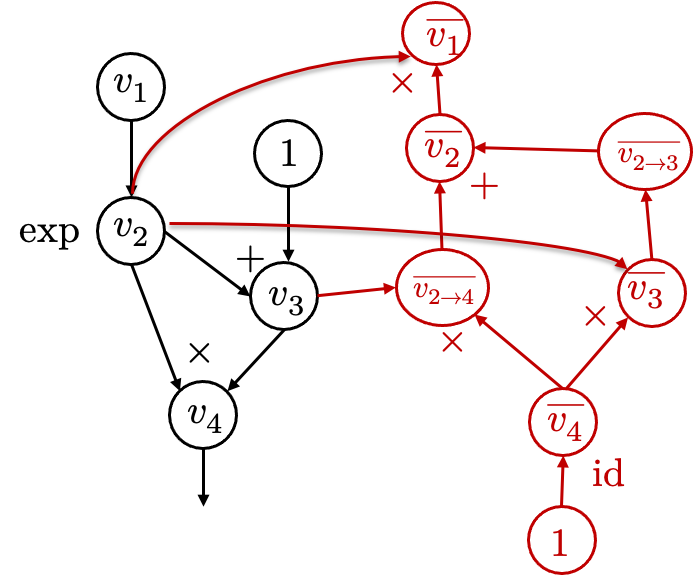

In [68]:
v1 = torch.tensor([1], requires_grad=True, dtype=torch.float32)
v2 = torch.exp(v1)
v3 = v2 + 1
v4 = v2 * v3

### View forward graph

In [69]:
import torch.nn as nn
from torch.fx import symbolic_trace

class M(nn.Module):
    def forward(self, x):
        v2 = torch.exp(x)
        v3 = v2 + 1
        v4 = v2 * v3
        return v4

m = M()
tm = symbolic_trace(m)
print(tm.graph)

graph():
    %x : [num_users=1] = placeholder[target=x]
    %exp : [num_users=2] = call_function[target=torch.exp](args = (%x,), kwargs = {})
    %add : [num_users=1] = call_function[target=operator.add](args = (%exp, 1), kwargs = {})
    %mul : [num_users=1] = call_function[target=operator.mul](args = (%exp, %add), kwargs = {})
    return mul


### View backward graph

`v1` is a leaf tensor (it was created by the user), so


In [70]:
v1.grad_fn   # None

`v2 = exp(v1)` has a grad function:

In [71]:
print(v2.grad_fn)

`v3 = v2 + 1`:

In [72]:
print(v3.grad_fn)

`v4 = v2 * v3`:

In [73]:
print(v4.grad_fn)

**How to get inputs?**

Each `grad_fn` has a field `.next_functions`, which lists its inputs:

In [74]:
print(v4.grad_fn.next_functions)

((<ExpBackward0 object at 0x7a489bfef730>, 0), (<AddBackward0 object at 0x7a489bfef5b0>, 0))


Graph vizualization

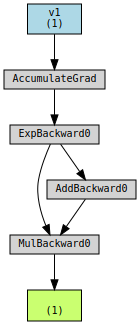

In [75]:
make_dot(v4, params={'v1': v1})

Explanation of 2nd output of `.next_functions`

Source: [stackoverflow](https://stackoverflow.com/questions/63855505/explanation-of-the-tuple-grad-fn-next-functions-in-pytorch)

In [26]:
inp = torch.randn(2, requires_grad=True)
a, b = inp.unbind()
c = a + b
print(c.grad_fn.next_functions)

((<UnbindBackward0 object at 0x7a48ed3d3490>, 0), (<UnbindBackward0 object at 0x7a48ed3d3490>, 1))


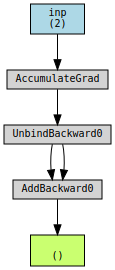

In [28]:
make_dot(c, params={'inp': inp})

### Backward method

In [80]:
v1 = torch.tensor([1], requires_grad=True, dtype=torch.float32)
v2 = torch.exp(v1)
v3 = v2 + 1
v4 = v2 * v3

v2.retain_grad()
v3.retain_grad()
v4.retain_grad()

v4.backward()

In [81]:
v1.grad, v2.grad, v3.grad, v4.grad

(tensor([17.4964]), tensor([6.4366]), tensor([2.7183]), tensor([1.]))

In [85]:
v1 = torch.tensor([1], requires_grad=True, dtype=torch.float32)
v2 = torch.exp(v1)
v3 = v2 + 1
v4 = v2 * v3

v2.retain_grad()
v3.retain_grad()
v4.retain_grad()

v4.backward(retain_graph=True)
v4.backward()

In [86]:
v1.grad, v2.grad, v3.grad, v4.grad

(tensor([34.9928]), tensor([12.8731]), tensor([5.4366]), tensor([2.]))

## 3. Datasets & DataLoaders

Code for processing data samples can get messy and hard to maintain; we
ideally want our dataset code to be decoupled from our model training
code for better readability and modularity. PyTorch provides two data
primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset`
that allow you to use pre-loaded datasets as well as your own data.
`Dataset` stores the samples and their corresponding labels, and
`DataLoader` wraps an iterable around the `Dataset` to enable easy
access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such
as FashionMNIST) that subclass `torch.utils.data.Dataset` and implement
functions specific to the particular data. They can be used to prototype
and benchmark your model. You can find them here: [Image
Datasets](https://pytorch.org/vision/stable/datasets.html), [Text
Datasets](https://pytorch.org/text/stable/datasets.html), and [Audio
Datasets](https://pytorch.org/audio/stable/datasets.html)


### 3.1. Loading a Dataset

Here is an example of how to load the
[Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/)
dataset from TorchVision. Fashion-MNIST is a dataset of Zalando's
article images consisting of 60,000 training examples and 10,000 test
examples. Each example comprises a 28×28 grayscale image and an
associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:

- `root` is the path where the train/test data is stored,
- `train` specifies training or test dataset,
- `download=True` downloads the data from the internet if it\'s not available at `root`.
- `transform` and `target_transform` specify the feature and label transformations


In [36]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 269kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.48MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.45MB/s]


### 3.2. Iterating and Visualizing the Dataset

We can index `Datasets` manually like a list: `training_data[index]`. We
use `matplotlib` to visualize some samples in our training data.


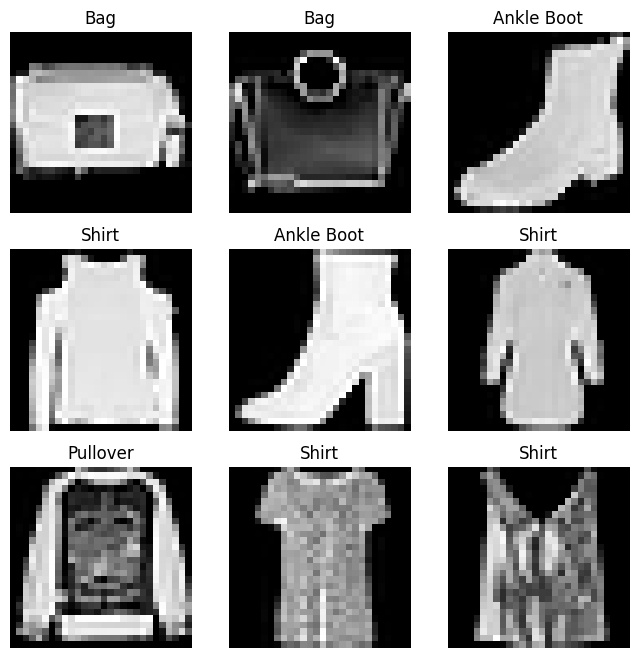

In [34]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### 3.3. Creating a Custom Dataset for your files

A custom Dataset class must implement three functions:
`__init__`, `__len__`, and
`__getitem__`. Take a look at this implementation; the
FashionMNIST images are stored in a directory `img_dir`, and their
labels are stored separately in a CSV file `annotations_file`.

In the next sections, we\'ll break down what\'s happening in each of
these functions.


In [35]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

**`__init__`**

The `__init__` function is run once when instantiating the
Dataset object. We initialize the directory containing the images, the
annotations file, and both transforms (covered in more detail in the
next section).

The labels.csv file looks like:

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9


In [36]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

**`__len__`**

The `__len__` function returns the number of samples in our
dataset.

Example:


In [37]:
def __len__(self):
    return len(self.img_labels)

**`__getitem__`**

The `__getitem__` function loads and returns a sample from
the dataset at the given index `idx`. Based on the index, it identifies
the image\'s location on disk, converts that to a tensor using
`decode_image`, retrieves the corresponding label from the csv data in
`self.img_labels`, calls the transform functions on them (if
applicable), and returns the tensor image and corresponding label in a
tuple.


In [38]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

### 3.4. Preparing your data for training with DataLoaders

The `Dataset` retrieves our dataset\'s features and labels one sample at
a time. While training a model, we typically want to pass samples in
\"minibatches\", reshuffle the data at every epoch to reduce model
overfitting, and use Python\'s `multiprocessing` to speed up data
retrieval.

`DataLoader` is an iterable that abstracts this complexity for us in an
easy API.


In [39]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### 3.5. Iterate through the DataLoader

We have loaded that dataset into the `DataLoader` and can iterate
through the dataset as needed. Each iteration below returns a batch of
`train_features` and `train_labels` (containing `batch_size=64` features
and labels respectively). Because we specified `shuffle=True`, after we
iterate over all batches the data is shuffled (for finer-grained control
over the data loading order, take a look at
[Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


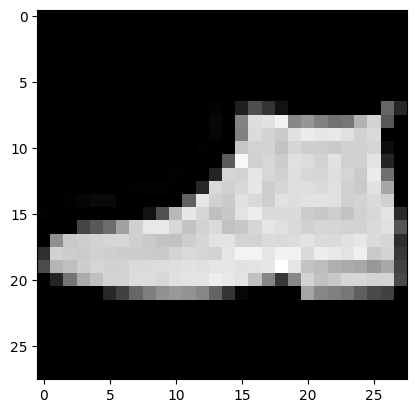

Label: 9


In [40]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## 4. Transforms

Data does not always come in its final processed form that is required
for training machine learning algorithms. We use **transforms** to
perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters - `transform` to modify the
features and `target_transform` to modify the labels - that accept
callables containing the transformation logic. The
[torchvision.transforms](https://pytorch.org/vision/stable/transforms.html)
module offers several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are
integers. For training, we need the features as normalized tensors, and
the labels as one-hot encoded tensors. To make these transformations, we
use `ToTensor` and `Lambda`.


In [41]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

**ToTensor()**

[ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor)
converts a PIL image or NumPy `ndarray` into a `FloatTensor`. and scales
the image\'s pixel intensity values in the range \[0., 1.\]


**Lambda Transforms**

Lambda transforms apply any user-defined lambda function. Here, we
define a function to turn the integer into a one-hot encoded tensor. It
first creates a zero tensor of size 10 (the number of labels in our
dataset) and calls
[scatter\_](https://pytorch.org/docs/stable/generated/torch.Tensor.scatter_.html)
which assigns a `value=1` on the index as given by the label `y`.


## 5. Build the Neural Network

Neural networks comprise of layers/modules that perform operations on
data. The [torch.nn](https://pytorch.org/docs/stable/nn.html) namespace
provides all the building blocks you need to build your own neural
network. Every module in PyTorch subclasses the
[nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
A neural network is a module itself that consists of other modules
(layers). This nested structure allows for building and managing complex
architectures easily.

In the following sections, we\'ll build a neural network to classify
images in the FashionMNIST dataset.


In [42]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## 5.1. Get Device for Training

We want to be able to train our model on an
[accelerator](https://pytorch.org/docs/stable/torch.html#accelerators)
such as CUDA, MPS, MTIA, or XPU. If the current accelerator is
available, we will use it. Otherwise, we use the CPU.


In [43]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## 5.2. Define the Class

We define our neural network by subclassing `nn.Module`, and initialize
the neural network layers in `__init__`. Every `nn.Module` subclass
implements the operations on input data in the `forward` method.


In [44]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()

        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

We create an instance of `NeuralNetwork`, and move it to the `device`,
and print its structure.


In [100]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [102]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28), device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
            Linear-4                  [-1, 512]         262,656
              ReLU-5                  [-1, 512]               0
            Linear-6                   [-1, 10]           5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.55
Estimated Total Size (MB): 2.58
----------------------------------------------------------------


To use the model, we pass it the input data. This executes the model\'s
`forward`, along with some [background
operations](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866).
Do not call `model.forward()` directly!

Calling the model on the input returns a 2-dimensional tensor with dim=0
corresponding to each output of 10 raw predicted values for each class,
and dim=1 corresponding to the individual values of each output. We get
the prediction probabilities by passing it through an instance of the
`nn.Softmax` module.


In [103]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)

pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([0], device='cuda:0')


### 5.3. Model Layers

Let\'s break down the layers in the FashionMNIST model. To illustrate
it, we will take a sample minibatch of 3 images of size 28x28 and see
what happens to it as we pass it through the network.


In [47]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


**nn.Flatten**

We initialize the
[nn.Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)
layer to convert each 2D 28x28 image into a contiguous array of 784
pixel values ( the minibatch dimension (at dim=0) is maintained).


In [48]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


**nn.Linear**

The [linear layer](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
is a module that applies a linear transformation on the input using its
stored weights and biases.


In [49]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


**nn.ReLU**

Non-linear activations are what create the complex mappings between the
model\'s inputs and outputs. They are applied after linear
transformations to introduce *nonlinearity*, helping neural networks
learn a wide variety of phenomena.

In this model, we use
[nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)
between our linear layers, but there\'s other activations to introduce
non-linearity in your model.


In [50]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.0088,  0.5028,  0.0797,  0.5183,  0.1674,  0.1411,  0.3158,  0.5644,
          0.0662, -0.2512,  0.2873,  0.1655, -0.0897, -0.1522,  0.2957, -0.2157,
          0.2712, -0.0749, -0.3421,  0.4223],
        [ 0.0974,  0.4201,  0.0914,  0.4140,  0.2615,  0.4552,  0.4529,  0.7833,
          0.1091, -0.1389,  0.3665, -0.0784,  0.3522, -0.0213,  0.1965,  0.0849,
          0.1627, -0.1207, -0.2233,  0.6422],
        [ 0.3591,  0.3805,  0.5090,  0.7243,  0.1349,  0.0265,  0.2811,  1.0254,
         -0.0735,  0.2177,  0.2017, -0.0292,  0.4935, -0.1796,  0.5183, -0.2242,
          0.1997, -0.0176, -0.3045,  0.3384]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.5028, 0.0797, 0.5183, 0.1674, 0.1411, 0.3158, 0.5644, 0.0662,
         0.0000, 0.2873, 0.1655, 0.0000, 0.0000, 0.2957, 0.0000, 0.2712, 0.0000,
         0.0000, 0.4223],
        [0.0974, 0.4201, 0.0914, 0.4140, 0.2615, 0.4552, 0.4529, 0.7833, 0.1091,
         0.0000, 0.3665, 0.0000, 0.3522, 0.0000, 0.19

**nn.Sequential**

[nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)
is an ordered container of modules. The data is passed through all the
modules in the same order as defined. You can use sequential containers
to put together a quick network like `seq_modules`.


In [51]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

**nn.Softmax**

The last linear layer of the neural network returns [logits]{.title-ref}
- raw values in \[-infty, infty\] - which are passed to the
[nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)
module. The logits are scaled to values \[0, 1\] representing the
model\'s predicted probabilities for each class. `dim` parameter
indicates the dimension along which the values must sum to 1.


In [52]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

### 5.4. Model Parameters

Many layers inside a neural network are *parameterized*, i.e. have
associated weights and biases that are optimized during training.
Subclassing `nn.Module` automatically tracks all fields defined inside
your model object, and makes all parameters accessible using your
model\'s `parameters()` or `named_parameters()` methods.

In this example, we iterate over each parameter, and print its size and
a preview of its values.


In [53]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0177, -0.0165, -0.0150,  ..., -0.0322,  0.0068,  0.0159],
        [-0.0268, -0.0167, -0.0175,  ..., -0.0147,  0.0331,  0.0071]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0200, 0.0187], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0083, -0.0398,  0.0136,  ..., -0.0403,  0.0122,  0.0426],
        [-0.0348,  0.0100,  0.0044,  ..., -0.0369, -0.0270, -0.0435]],
       device='cuda:0', grad_fn=<Slic

Ad-hoc calculation of parameters count

In [105]:
sum([p.numel() for p in model.parameters() if p.requires_grad])

669706

## 6. Optimizing Model Parameters

Now that we have a model and data it\'s time to train, validate and test
our model by optimizing its parameters on our data. Training a model is
an iterative process; in each iteration the model makes a guess about
the output, calculates the error in its guess (*loss*), collects the
derivatives of the error with respect to its parameters, and **optimizes** these
parameters using gradient descent. For a more detailed walkthrough of
this process, check out this video on [backpropagation from
3Blue1Brown](https://www.youtube.com/watch?v=tIeHLnjs5U8).

### 6.1. Prerequisite Code

We load the code from the previous sections on **3. Datasets & DataLoaders** and **5. Build Model**.

In [54]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

### 6.2. Hyperparameters

Hyperparameters are adjustable parameters that let you control the model
optimization process. Different hyperparameter values can impact model
training and convergence rates ([read
more](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html)
about hyperparameter tuning)

We define the following hyperparameters for training:

- **Number of Epochs** - the number of times to iterate over the dataset
- **Batch Size** - the number of data samples propagated through the network before the parameters are updated
- **Learning Rate** - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [55]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

### 6.3. Optimization Loop

Once we set our hyperparameters, we can then train and optimize our
model with an optimization loop. Each iteration of the optimization loop
is called an **epoch**.

Each epoch consists of two main parts:

- **The Train Loop** - iterate over the training dataset and try to converge to optimal parameters.
- **The Validation/Test Loop** - iterate over the test dataset to check if model performance is improving.

Let\'s briefly familiarize ourselves with some of the concepts used in
the training loop.

### 6.4. Loss Function

When presented with some training data, our untrained network is likely
not to give the correct answer. **Loss function** measures the degree of
dissimilarity of obtained result to the target value, and it is the loss
function that we want to minimize during training. To calculate the loss
we make a prediction using the inputs of our given data sample and
compare it against the true data label value.

Common loss functions include
[nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss)
(Mean Square Error) for regression tasks, and
[nn.NLLLoss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss)
(Negative Log Likelihood) for classification.
[nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss)
combines `nn.LogSoftmax` and `nn.NLLLoss`.

We pass our model\'s output logits to `nn.CrossEntropyLoss`, which will
normalize the logits and compute the prediction error.


In [56]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

### 6.5. Optimizer

Optimization is the process of adjusting model parameters to reduce
model error in each training step. **Optimization algorithms** define
how this process is performed (in this example we use Stochastic
Gradient Descent). All optimization logic is encapsulated in the
`optimizer` object. Here, we use the SGD optimizer; additionally, there
are many [different
optimizers](https://pytorch.org/docs/stable/optim.html) available in
PyTorch such as ADAM and RMSProp, that work better for different kinds
of models and data.

We initialize the optimizer by registering the model\'s parameters that
need to be trained, and passing in the learning rate hyperparameter.


In [58]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, optimization happens in three steps:

1. Call `optimizer.zero_grad()` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
2. Backpropagate the prediction loss with a call to `loss.backward()`. PyTorch deposits the gradients of the loss w.r.t. each parameter.
3. Once we have our gradients, we call `optimizer.step()` to adjust the parameters by the gradients collected in the backward pass.


### 6.6. Full Implementation

We define `train_loop` that loops over our optimization code, and
`test_loop` that evaluates the model\'s performance against our test
data.


In [59]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to
`train_loop` and `test_loop`. Feel free to increase the number of epochs
to track the model\'s improving performance.


In [60]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.312786  [   64/60000]
loss: 2.290025  [ 6464/60000]
loss: 2.268042  [12864/60000]
loss: 2.264827  [19264/60000]
loss: 2.240343  [25664/60000]
loss: 2.221338  [32064/60000]
loss: 2.224098  [38464/60000]
loss: 2.195456  [44864/60000]
loss: 2.189399  [51264/60000]
loss: 2.149702  [57664/60000]
Test Error: 
 Accuracy: 50.4%, Avg loss: 2.147376 

Epoch 2
-------------------------------
loss: 2.161468  [   64/60000]
loss: 2.145787  [ 6464/60000]
loss: 2.078798  [12864/60000]
loss: 2.101902  [19264/60000]
loss: 2.035046  [25664/60000]
loss: 1.985255  [32064/60000]
loss: 2.013172  [38464/60000]
loss: 1.935472  [44864/60000]
loss: 1.938182  [51264/60000]
loss: 1.859026  [57664/60000]
Test Error: 
 Accuracy: 58.9%, Avg loss: 1.859608 

Epoch 3
-------------------------------
loss: 1.900503  [   64/60000]
loss: 1.861808  [ 6464/60000]
loss: 1.732317  [12864/60000]
loss: 1.783581  [19264/60000]
loss: 1.655448  [25664/60000]
loss: 1.624867  [32064/600